In [1]:
import random
import numpy as np
import torch
import os
import pathlib
import pickle
import pandas as pd
torch.manual_seed(42)
torch.cuda.manual_seed(42)

import Figure_H2H_Regret

from Performance import performance_evaluation
perfs = performance_evaluation()

from Performance import H2h_Regret_Evaluation
h2h_regret_eva = H2h_Regret_Evaluation()

from Data import Data_Simulator
DS_Obj = Data_Simulator()

from Oracle import Oracle_Processing
Oracle_Proc = Oracle_Processing()

from OLS import OLS_Processing
OLS_Proc = OLS_Processing()

from DDR import DDR_Processing
DDR_Proc = DDR_Processing()

from PYEPO import EPO_Processing
PYEPO_Proc = EPO_Processing()

from Data_Load_Store import Load_Store_Methods
Data_LSM = Load_Store_Methods()

In [2]:
import Baseline_Params 
import Sequential_Learning_Approaches as SLA
import Integrated_Learning_Approaches as ILA

### Parameters

In [3]:
data_generation_process = "SPO_Data_Generation"
# data_generation_process = "DDR_Data_Generation"

current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
project_directory = os.path.dirname(os.path.dirname(os.path.dirname(parent_directory)))
middle_path = '/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_' + data_generation_process +"/"
working_dir = project_directory + middle_path
Result_dir = project_directory + middle_path + "Result/"
pathlib.Path(working_dir).mkdir(parents=True, exist_ok=True)
pathlib.Path(Result_dir).mkdir(parents=True, exist_ok=True)

In [4]:
num_train, num_feat, num_test, deg, e, lower, upper, p, alpha, mis, coef_seed, x_dist, e_dist, x_low, x_up, x_mean, x_var, bump, grid_all, iteration_all,mu_all,lamb_all = Baseline_Params.get_Params(working_dir)

### 2. Fix $\mu = 0.75$ and $\lambda = 0.8$, run different approaches

In [5]:
grid_all = [(3, 3)]
mu_all = [0.75]
lamb_all = [0.8]

##### 2.1 Run Oracle

In [6]:
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]
    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_Oracle_Ante_all.pkl"):
        print("Results already exist")
    else:
        SLA.Run_Oracle(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist


##### 2.2 Run OLS

In [7]:
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]

    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_OLS_Ante_all.pkl"):
        print("Results already exist")
    else:
        SLA.Run_OLS(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist


##### 2.3 Run DDR

In [8]:
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]
    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_DDR_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.Run_DDR(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist


##### 2.4 Run SPO+

In [9]:
method_names = ["spo+"]
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]
    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_spo+_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist


##### 2.5 Run PG

In [10]:
method_names = ["pg"]
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]

    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_pg_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist


##### 2.6 Run LTR

In [11]:
method_names = ["ltr"]
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]

    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_ltr_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist


##### 2.7 Run Random Forest

In [12]:
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]

    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_RF_Ante_all.pkl"):
        print("Results already exist")
    else:
        SLA.Run_Random_Forest(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist


##### 2.8 Run XGBoost

In [13]:
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]

    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_XG_Ante_all.pkl"):
        print("Results already exist")
    else:
        SLA.Run_XGBoost(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist


### Comparison

In [14]:
from scipy.stats import gaussian_kde
from matplotlib import gridspec
import seaborn as sns
import matplotlib.pyplot as plt
def Upright_Figure(all_x, all_y, figure_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], 
                        ymin = 0, ymax=100,xmin = 0,xmax = 100):
    
    data = np.asarray([all_x,all_y])

    ####### Obtain KDE  
    #KDE for top marginal
    kde_X = gaussian_kde(data[0])
    #KDE for right marginal
    kde_Y = gaussian_kde(data[1])

    x = np.linspace(0, 100, 100)
    y = np.linspace(ymin, ymax, 100)

    dx = kde_X(x) # X-marginal density
    dy = kde_Y(y) # Y-marginal density

    #Define grid for subplots
    gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios = [1, 3])

    ####### Create scatter plot
    fig = plt.figure(figsize = size)
    ax = plt.subplot(gs[1, 0])
    cax = ax.scatter(data[0], data[1], s = 15, color='#003D7C', marker = "o", edgecolors = "#EF7C00")
    plt.xlabel('Head-to-head (%)')

    plt.ylabel('Regret reduction (%)') #pio
    plt.vlines(50, ymin, ymax, linestyle="dashed", alpha = 0.8,color = 'k')
    plt.hlines(0, xmin, xmax, linestyle="dashed", alpha = 0.8,color = 'k')

    # ####### Create Y-marginal (right)
    axr = plt.subplot(gs[1, 1], xticks = [], yticks = [], frameon = False)
    axr.plot(dy, y, color = 'black')

    axr.fill_betweenx(y, 0, dy, where = y <= 0.01, alpha = 1, color='#EF7C00')
    axr.fill_betweenx(y, 0, dy, where = y >= 0, alpha = 1, color='#003D7C')

    leftarea = np.round( sum(n <= 0 for n in all_y)/len(all_y),2 )
    rightarea = np.round( sum(n > 0 for n in all_y)/len(all_y),2 )

    axr.annotate(leftarea, xy=(0.15, abs(ymin)/(ymax - ymin) + move[0]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
    axr.annotate(rightarea, xy=(0.15, abs(ymin)/(ymax - ymin) + move[1]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)

    # ####### Create X-marginal (top)
    axt = plt.subplot(gs[0,0], frameon = False, yticks = [], xticks = [])
    #base = pyplot.gca().transData
    #rot = transforms.Affine2D().rotate_deg(180)
    axt.plot(x, dx, color = 'black')
    axt.fill_between(x, 0, dx, where = x >= 49.9, alpha= 1, color = '#003D7C')
    axt.fill_between(x, 0, dx, where = x <= 50, alpha= 1, color = '#EF7C00')

    #     axt.invert_yaxis()
    leftarea = np.round( sum(n <= 50 for n in all_x)/len(all_x),2 )
    rightarea = np.round( sum(n > 50 for n in all_x)/len(all_x),2 )

    axt.annotate(leftarea, xy=(move[2], 0.15), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
    axt.annotate(rightarea, xy=(move[3], 0.15), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)

    # ####### Bring the marginals closer to the scatter plot and save eps file
    fig.tight_layout(pad = 1)
    # # plt.savefig(figure_name + '.eps', format='eps')
    plt.savefig(figure_name + '.pdf', format='pdf')

In [15]:
def obtain_DDR_vs_benchmarks_h2h_regret(grid_all,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist,mu_all,lamb_all,benchmark):
    h2h_ = {}; cost_rd_ = {}; regret_rd_ = {}
    for grid in grid_all:
        L_N = grid[0]
        DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
        DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)     
        cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
        with open(DataPath+'cost_spo+_Ante_all.pkl', "rb") as tf:
            cost_SPO_Ante_all = pickle.load(tf)
        with open(DataPath+'cost_rf_Ante_all.pkl', "rb") as tf:
            cost_RF_Ante_all = pickle.load(tf)
        with open(DataPath+'cost_xg_Ante_all.pkl', "rb") as tf:
            cost_XG_Ante_all = pickle.load(tf)
        with open(DataPath+'cost_pg_Ante_all.pkl', "rb") as tf:
            cost_PG_Ante_all = pickle.load(tf)
        with open(DataPath+'cost_ltr_Ante_all.pkl', "rb") as tf:
            cost_LTR_Ante_all = pickle.load(tf)

        for mu in mu_all:
            for lamb in lamb_all:
                if benchmark == "OLS":
                    h2h_[L_N,mu,lamb],regret_rd_[L_N,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_OLS_Ante_all,cost_Oracle_Ante_all)
                if benchmark == "SPO+":
                    h2h_[L_N,mu,lamb],regret_rd_[L_N,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_SPO_Ante_all,cost_Oracle_Ante_all)
                if benchmark == "RF":
                    h2h_[L_N,mu,lamb],regret_rd_[L_N,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_RF_Ante_all,cost_Oracle_Ante_all)
                if benchmark == "XG":
                    h2h_[L_N,mu,lamb],regret_rd_[L_N,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_XG_Ante_all,cost_Oracle_Ante_all)
                if benchmark == "PG":
                    h2h_[L_N,mu,lamb],regret_rd_[L_N,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_PG_Ante_all,cost_Oracle_Ante_all)
                if benchmark == "LTR":
                    h2h_[L_N,mu,lamb],regret_rd_[L_N,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_LTR_Ante_all,cost_Oracle_Ante_all)
        print("Grid = ",grid)
    return h2h_,regret_rd_

### Comparison between DDR with SLO Approaches

##### DDR vs OLS

In [16]:
h2h_ddr_vs_ols_ante,regret_rd_ddr_vs_ols_ante = obtain_DDR_vs_benchmarks_h2h_regret(grid_all,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist,mu_all,lamb_all,"OLS")

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Grid =  (3, 3)


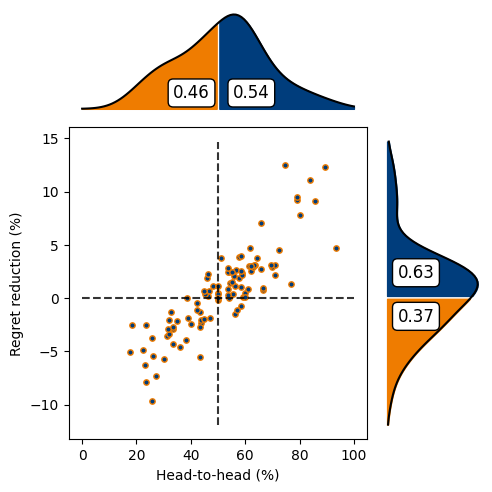

In [17]:
L_N = 3
mu = 0.75
lamb = 0.8
file_name = Result_dir + 'DDR_vs_OLS_mu='+str(mu)+"_lamb="+str(lamb)+"_ante_grid="+str(L_N)
all_x = h2h_ddr_vs_ols_ante[L_N,mu,lamb] * 100
all_y = regret_rd_ddr_vs_ols_ante[L_N,mu,lamb] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs Random Forest

In [18]:
h2h_ddr_vs_rf_ante,regret_rd_ddr_vs_rf_ante = obtain_DDR_vs_benchmarks_h2h_regret(grid_all,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist,mu_all,lamb_all,"RF")

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Grid =  (3, 3)


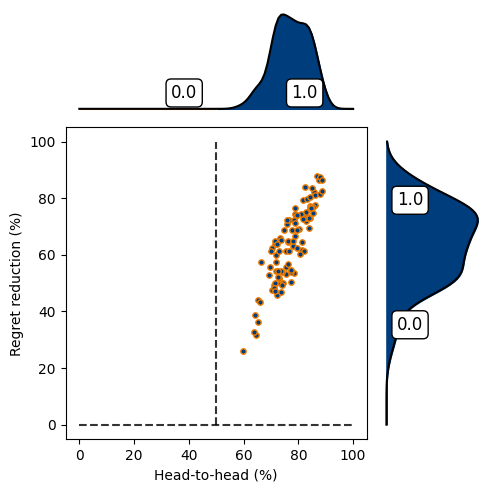

In [19]:
L_N = 3
mu = 0.75
lamb = 0.8
file_name = Result_dir + 'DDR_vs_RF_mu='+str(mu)+"_lamb="+str(lamb)+"_ante_grid="+str(L_N)
all_x = h2h_ddr_vs_rf_ante[L_N,mu,lamb] * 100
all_y = regret_rd_ddr_vs_rf_ante[L_N,mu,lamb] * 100
Upright_Figure(all_x, all_y, file_name, size = (5, 5), move = [0.35, 0.75, 0.35, 0.75], ymin = 0, ymax=100,xmin = 0,xmax = 100)

##### DDR vs XGBoost

In [20]:
h2h_ddr_vs_xg_ante,regret_rd_ddr_vs_xg_ante = obtain_DDR_vs_benchmarks_h2h_regret(grid_all,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist,mu_all,lamb_all,"XG")

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Grid =  (3, 3)


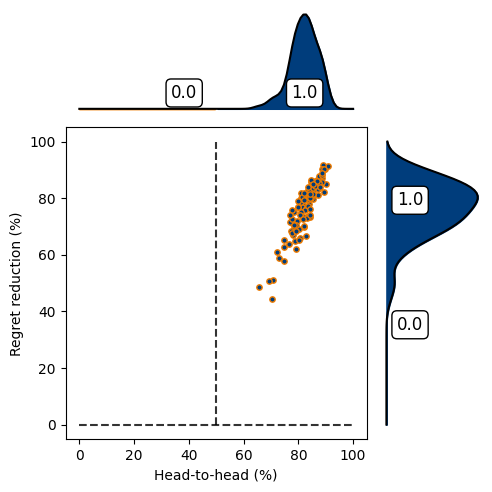

In [21]:
L_N = 3
mu = 0.75
lamb = 0.8
file_name = Result_dir + 'DDR_vs_XG_mu='+str(mu)+"_lamb="+str(lamb)+"_ante_grid="+str(L_N)
all_x = h2h_ddr_vs_xg_ante[L_N,mu,lamb] * 100
all_y = regret_rd_ddr_vs_xg_ante[L_N,mu,lamb] * 100
Upright_Figure(all_x, all_y, file_name, size = (5, 5), move = [0.35, 0.75, 0.35, 0.75], ymin = 0, ymax=100,xmin = 0,xmax = 100)

### RMSE

In [22]:
def obtain_RMSE(grid_all,file_name,iteration_all,is_DDR,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist):
    RMSE_ = {}
    for grid in grid_all:
        L_N = grid[0]
        DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
        DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)     
        with open(DataPath+file_name, "rb") as tf:
            RMSE_all = pickle.load(tf)
        if is_DDR:
            RMSE_[L_N] = [RMSE_all[iter,mu,lamb] for iter in iteration_all]
        else:
            RMSE_[L_N] = [RMSE_all[iter] for iter in iteration_all]
        print("Grid = ",grid)
    return RMSE_

In [23]:
mu=0.75
lamb = 0.8

RMSE_in_OLS = obtain_RMSE(grid_all,'RMSE_in_OLS_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)
RMSE_out_OLS = obtain_RMSE(grid_all,'RMSE_out_OLS_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)

RMSE_in_RF = obtain_RMSE(grid_all,'RMSE_in_RF_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)
RMSE_out_RF = obtain_RMSE(grid_all,'RMSE_out_RF_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)

RMSE_in_XG = obtain_RMSE(grid_all,'RMSE_in_XG_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)
RMSE_out_XG = obtain_RMSE(grid_all,'RMSE_out_XG_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)

RMSE_in_DDR = obtain_RMSE(grid_all,'RMSE_in_DDR_all.pkl',iteration_all,True,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)
RMSE_out_DDR = obtain_RMSE(grid_all,'RMSE_out_DDR_all.pkl',iteration_all,True,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Grid =  (3, 3)
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Grid =  (3, 3)
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Grid =  (3, 3)
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Grid =  (3, 3)
DataPath: /Users/zhangxun/Dropbox/Research/D

In [24]:
print("RMSE_in_OLS=",np.round(np.nanmean(RMSE_in_OLS[L_N]),4),",RMSE_out_OLS=",np.round(np.nanmean(RMSE_out_OLS[L_N]),4))
print("RMSE_in_RF=",np.round(np.nanmean(RMSE_in_RF[L_N]),4),",RMSE_out_RF=",np.round(np.nanmean(RMSE_out_RF[L_N]),4))
print("RMSE_in_XG=",np.round(np.nanmean(RMSE_in_XG[L_N]),4),",RMSE_out_XG=",np.round(np.nanmean(RMSE_out_XG[L_N]),4))
print("RMSE_in_DDR=",np.round(np.nanmean(RMSE_in_DDR[L_N]),4),",RMSE_out_DDR=",np.round(np.nanmean(RMSE_out_DDR[L_N]),4))

RMSE_in_OLS= 3.9416 ,RMSE_out_OLS= 4.1846
RMSE_in_RF= 1.6531 ,RMSE_out_RF= 4.4255
RMSE_in_XG= 3.114 ,RMSE_out_XG= 4.5833
RMSE_in_DDR= 3.944 ,RMSE_out_DDR= 4.183


In [25]:
q_tile = 0.05
print("5% tile RMSE_in_OLS=",np.round(np.quantile(RMSE_in_OLS[L_N],q_tile),4),",RMSE_out_OLS=",np.round(np.quantile(RMSE_out_OLS[L_N],q_tile),4))
print("5% tile RMSE_in_RF=",np.round(np.quantile(RMSE_in_RF[L_N],q_tile),4),",RMSE_out_RF=",np.round(np.quantile(RMSE_out_RF[L_N],q_tile),4))
print("5% RMSE_in_XG=",np.round(np.quantile(RMSE_in_XG[L_N],q_tile),4),",RMSE_out_XG=",np.round(np.quantile(RMSE_out_XG[L_N],q_tile),4))
print("5% RMSE_in_DDR=",np.round(np.quantile(RMSE_in_DDR[L_N],q_tile),4),",RMSE_out_DDR=",np.round(np.quantile(RMSE_out_DDR[L_N],q_tile),4))

5% tile RMSE_in_OLS= 3.8393 ,RMSE_out_OLS= 4.1279
5% tile RMSE_in_RF= 1.5872 ,RMSE_out_RF= 4.3479
5% RMSE_in_XG= 2.9835 ,RMSE_out_XG= 4.4822
5% RMSE_in_DDR= 3.8418 ,RMSE_out_DDR= 4.1286


In [26]:
q_tile = 0.95
print("95% tile RMSE_in_OLS=",np.round(np.quantile(RMSE_in_OLS[L_N],q_tile),4),",RMSE_out_OLS=",np.round(np.quantile(RMSE_out_OLS[L_N],q_tile),4))
print("95% tile RMSE_in_RF=",np.round(np.quantile(RMSE_in_RF[L_N],q_tile),4),",RMSE_out_RF=",np.round(np.quantile(RMSE_out_RF[L_N],q_tile),4))
print("95% RMSE_in_XG=",np.round(np.quantile(RMSE_in_XG[L_N],q_tile),4),",RMSE_out_XG=",np.round(np.quantile(RMSE_out_XG[L_N],q_tile),4))
print("95% RMSE_in_DDR=",np.round(np.quantile(RMSE_in_DDR[L_N],q_tile),4),",RMSE_out_DDR=",np.round(np.quantile(RMSE_out_DDR[L_N],q_tile),4))

95% tile RMSE_in_OLS= 4.0682 ,RMSE_out_OLS= 4.2395
95% tile RMSE_in_RF= 1.7039 ,RMSE_out_RF= 4.5155
95% RMSE_in_XG= 3.2322 ,RMSE_out_XG= 4.6913
95% RMSE_in_DDR= 4.0705 ,RMSE_out_DDR= 4.2352


### DDR vs Integrated Learning Approaches

##### DDR vs SPO+

In [27]:
h2h_ddr_vs_spo_ante,regret_rd_ddr_vs_spo_ante = obtain_DDR_vs_benchmarks_h2h_regret(grid_all,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist,mu_all,lamb_all,"SPO+")

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Grid =  (3, 3)


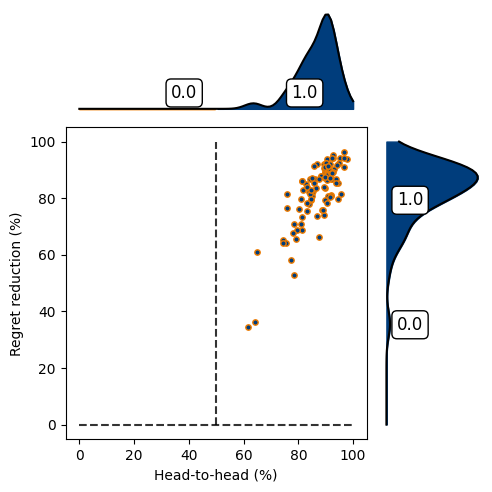

In [28]:
L_N = 3
mu = 0.75
lamb = 0.8
file_name = Result_dir + 'DDR_vs_SPO_mu='+str(mu)+"_lamb="+str(lamb)+"_ante_grid="+str(L_N)
all_x = h2h_ddr_vs_spo_ante[L_N,mu,lamb] * 100
all_y = regret_rd_ddr_vs_spo_ante[L_N,mu,lamb] * 100
Upright_Figure(all_x, all_y, file_name, size = (5, 5), move = [0.35, 0.75, 0.35, 0.75], ymin = 0, ymax=100,xmin = 0,xmax = 100)

##### DDR vs PG

In [29]:
h2h_ddr_vs_pg_ante,regret_rd_ddr_vs_pg_ante = obtain_DDR_vs_benchmarks_h2h_regret(grid_all,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist,mu_all,lamb_all,"PG")

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Grid =  (3, 3)


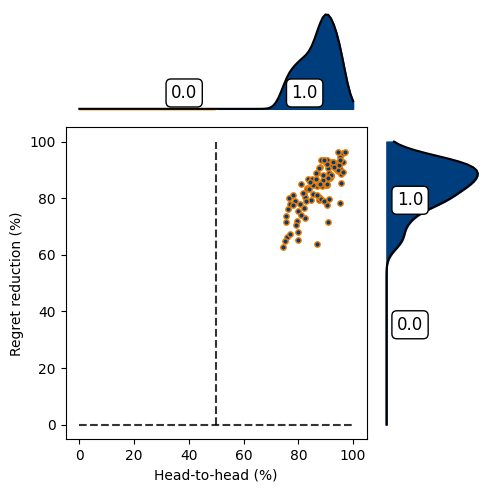

In [30]:
L_N = 3
mu = 0.75
lamb = 0.8
file_name = Result_dir + 'DDR_vs_PG_mu='+str(mu)+"_lamb="+str(lamb)+"_ante_grid="+str(L_N)
all_x = h2h_ddr_vs_pg_ante[L_N,mu,lamb] * 100
all_y = regret_rd_ddr_vs_pg_ante[L_N,mu,lamb] * 100
Upright_Figure(all_x, all_y, file_name, size = (5, 5), move = [0.35, 0.75, 0.35, 0.75], ymin = 0, ymax=100,xmin = 0,xmax = 100)

##### DDR vs LTR

In [31]:
h2h_ddr_vs_ltr_ante,regret_rd_ddr_vs_ltr_ante = obtain_DDR_vs_benchmarks_h2h_regret(grid_all,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist,mu_all,lamb_all,"LTR")

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Baseline_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Grid =  (3, 3)


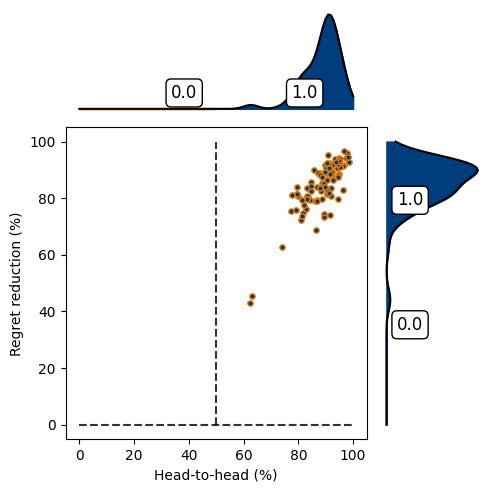

In [32]:
L_N = 3
mu = 0.75
lamb = 0.8
file_name = Result_dir + 'DDR_vs_LTR_mu='+str(mu)+"_lamb="+str(lamb)+"_ante_grid="+str(L_N)
all_x = h2h_ddr_vs_ltr_ante[L_N,mu,lamb] * 100
all_y = regret_rd_ddr_vs_ltr_ante[L_N,mu,lamb] * 100
Upright_Figure(all_x, all_y, file_name, size = (5, 5), move = [0.35, 0.75, 0.35, 0.75], ymin = 0, ymax=100,xmin = 0,xmax = 100)